# Impact of GDP per capita on employment in worldwide agriculture over the past 30 years  

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from functools import reduce


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

# import the API for WorldBank-data
from pandas_datareader import wb

# Read data

Here we are importing data using the API for WorldBank-data. We found the following data and data-codes using the Website of the WorldBank to provide us with different measures for countrys worldwide over the past decades:\
#
-Arable land in hectares --> *AG.LND.ARBL.HA*\
-Labor force --> *SL.TLF.TOTL.IN*\
-GDP per capita in USD --> *NY.GDP.PCAP.CD*\
-Employment in agriculture in % of total empoyment --> *SL.AGR.EMPL.ZS*

In [2]:
# Setting up list of ISO-codes of countries where we are going to import data from using the API
countries_ISO_list = ['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'AUS', 'AUT', 
                      'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 
                      'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 
                      'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 
                      'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 
                      'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 
                      'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 
                      'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 
                      'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 
                      'KIR', 'KNA', 'KOR', 'KWT', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 
                      'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 
                      'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 
                      'NAM', 'NCL', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NRU', 'NZL', 'OMN', 
                      'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'PNG', 'POL', 'PRI', 'PRK', 'PRT', 'PRY', 
                      'PSE', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SDN', 'SEN', 'SGP', 'SLE', 
                      'SLV', 'SMR', 'SOM', 'SRB', 'SSD', 'STP', 'SUR', 'SVK', 'SVN', 'SWE', 'SWZ', 
                      'SXM', 'SYC', 'SYR', 'TCA', 'TCD', 'TGO', 'THA', 'TJK', 'TKM', 'TLS', 'TON', 
                      'TTO', 'TUN', 'TUR', 'TUV', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'UZB', 'VCT', 
                      'VEN', 'VGB', 'VIR', 'VNM', 'VUT', 'WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE']

# Importing the different DataFrames from the WorldBank using the API from the lecture and resetting the index for each DataFrame
wb_arable_land = wb.download(indicator='AG.LND.ARBL.HA', country= countries_ISO_list, start=1989, end=2019)
wb_arable_land = wb_arable_land.reset_index()
wb_labor_force = wb.download(indicator='SL.TLF.TOTL.IN', country= countries_ISO_list, start=1989, end=2019)
wb_labor_force = wb_labor_force.reset_index()
wb_emp_ag = wb.download(indicator='SL.AGR.EMPL.ZS', country= countries_ISO_list, start=1989, end=2019)
wb_emp_ag = wb_emp_ag.reset_index()
wb_gdp_cap = wb.download(indicator='NY.GDP.PCAP.CD', country= countries_ISO_list, start=1989, end=2019)
wb_gdp_cap = wb_gdp_cap.reset_index()

# Clean and merge data 

In [3]:
# changing the data-type of the 'year'-column to an integer
wb_arable_land.year = wb_arable_land.year.astype(int)
wb_labor_force.year = wb_labor_force.year.astype(int)
wb_emp_ag.year = wb_emp_ag.year.astype(int)
wb_gdp_cap.year = wb_gdp_cap.year.astype(int)

# Merging all the DataFrames into one big one
data_frames_list = [wb_arable_land, wb_labor_force, wb_emp_ag, wb_gdp_cap]
data_frames_combined = reduce(lambda left, right: pd.merge(left, right, on = ['country', 'year'], how = 'inner'), data_frames_list)

# Renaming the columns
namedict = {
            'AG.LND.ARBL.HA':'Arable_Land',
            'SL.TLF.TOTL.IN':'Labor_Force',
            'SL.AGR.EMPL.ZS':'Empl_in_agri_in_%_of_all_empl',
            'NY.GDP.PCAP.CD':'GDP_per_capita'}
data_frames_combined.rename(columns=namedict, inplace=True)

# Dropping all rows that contain empty values (NAN)
data_frames_combined.dropna(inplace=True)

# Rounding the floats in columns 'Empl_in_agri_in_%_of_all_empl' and 'GDP_per_capita' 
data_frames_combined['Empl_in_agri_in_%_of_all_empl'] = data_frames_combined['Empl_in_agri_in_%_of_all_empl'].round(2)
data_frames_combined['GDP_per_capita'] = data_frames_combined['GDP_per_capita'].round(2)

# Converting the values in the columns into their respective units for a better display
data_frames_combined['Empl_in_agri_in_%_of_all_empl'] = data_frames_combined['Empl_in_agri_in_%_of_all_empl'].apply(lambda x: '{:.2f}%'.format(x*1))
data_frames_combined['GDP_per_capita'] = data_frames_combined['GDP_per_capita'].apply(lambda x: '${:.2f}'.format(x))
data_frames_combined['Arable_Land'] = data_frames_combined['Arable_Land'].apply(lambda x: '{:.0f} ha'.format(x))
data_frames_combined.Labor_Force = data_frames_combined.Labor_Force.astype(int)

# Display the created DataFrame so far
data_frames_combined

,country,year,Arable_Land,Labor_Force,Empl_in_agri_in_%_of_all_empl,GDP_per_capita
31,Afghanistan,2019,7788000 ha,9991682,42.50%,$500.52
32,Afghanistan,2018,7794000 ha,9613728,43.13%,$502.06
33,Afghanistan,2017,7699000 ha,9254594,43.99%,$530.15
34,Afghanistan,2016,7729000 ha,8913938,45.81%,$520.25
35,Afghanistan,2015,7765000 ha,8630723,47.07%,$592.48
...,...,...,...,...,...,...
6441,Zimbabwe,1995,3110000 ha,3958602,60.92%,$646.83
6442,Zimbabwe,1994,3100000 ha,3871382,61.08%,$634.58
6443,Zimbabwe,1993,3030000 ha,3824653,61.40%,$608.05
6444,Zimbabwe,1992,2990000 ha,3761641,61.47%,$634.45


## Exploring the individual data sets 

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [4]:
countries_list = data_frames_combined['country'].unique().tolist()

def plot_gdp_per_capita_and_agri_empl(country):
    # Filter the data for the selected country
    country_data = data_frames_combined[data_frames_combined['country'] == country]

    # Create the plot
    fig = go.Figure()

    # Add GDP per capita trace (left y-axis)
    fig.add_trace(go.Scatter(x=country_data['year'], y=country_data['GDP_per_capita'],
                             mode='lines+markers', name='GDP per capita'))

    # Add percentage of people working in agriculture trace (right y-axis)
    fig.add_trace(go.Scatter(x=country_data['year'], y=country_data['Empl_in_agri_in_%_of_all_empl'],
                             mode='lines+markers', name='Employment in agriculture (%)',
                             yaxis='y2'))

    # Set the plot title and axis labels
    fig.update_layout(
        title=f'GDP per capita and employment in agriculture for {country}',
        xaxis_title='Year',
        yaxis_title='GDP per capita',
        yaxis2=dict(
            title='Employment in agriculture (%)',
            overlaying='y',
            side='right'
        )
    )

    # Show the plot
    fig.show()

# Create a dropdown menu to select a country
interact(plot_gdp_per_capita_and_agri_empl, country=widgets.Dropdown(options=countries_list, value=countries_list[0], description='Country:'))


interactive(children=(Dropdown(description='Country:', options=('Afghanistan', 'Angola', 'Albania', 'United Ar…

<function __main__.plot_gdp_per_capita_and_agri_empl(country)>

Explain what you see when moving elements of the interactive plot around. 

# Analysis

Here we are computing new columns to finally reach our goal of finding the influence of GDP per capita on the amount of arable land farmed per person working in agriculture 

In [5]:
# Change units of columns back to floats to allow for calculation
data_frames_combined['Empl_in_agri_in_%_of_all_empl'] = data_frames_combined['Empl_in_agri_in_%_of_all_empl'].str.replace('%','').astype(float)
data_frames_combined['GDP_per_capita'] = data_frames_combined['GDP_per_capita'].str.replace('$','').astype(float)
data_frames_combined['Arable_Land'] = data_frames_combined['Arable_Land'].str.replace(' ha','').astype(int)

C:\Users\luke-\AppData\Local\Temp\ipykernel_18484\2347495243.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



(0.0, 500.0)

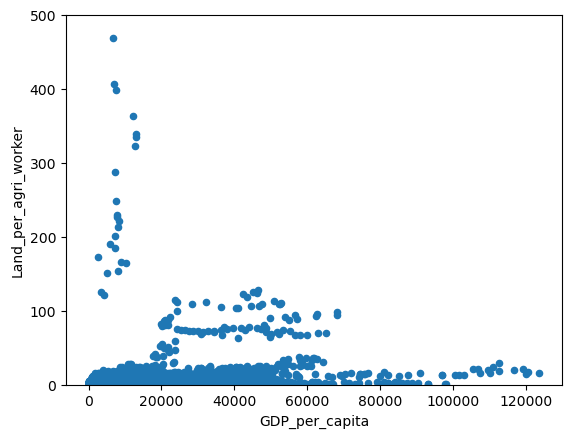

In [6]:
# Create a new column of the absolute amount of people working in the agriculture sector in a given year (and turn its values into integers)
data_frames_combined['People_in_agri'] = (data_frames_combined['Labor_Force'] * (data_frames_combined['Empl_in_agri_in_%_of_all_empl'] / 100)).astype(int)

# Create a new column of the arable land divided by the people working in the agriculture sector 
# This gives us an indicator on how much area one single worker can handle 
data_frames_combined['Land_per_agri_worker'] = data_frames_combined['Arable_Land'] / data_frames_combined['People_in_agri'] 

# Create a Scatterplot for the Top 10 biggest arable-countries and colour each country differently 

# The list of the 10 biggest countrys when it comes to arrable land:
#['USA', 'IND', 'RUS', 'CHN', 'BRA', 'CAN', 'UKR', 'NGA', 'ARG', 'AUS']

# Making comments and titles 

# Organize everything

# Create ReadMe file 


# Scatterplot 
ax = data_frames_combined.plot.scatter(x='GDP_per_capita', y='Land_per_agri_worker')
ax.set_ylim(bottom=0, top=500)



To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.